## Spotify - Recommendations based on Energy levels 

The recommendation system presented below was designed thinking about people who have an active life and would like a playlist to boost their workouts. 

The libraries used for the project are listed below:
- Pandas
- Numpy
- Matplotlib
- Seaborn
- SKLearn
- SKImage

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from skimage import io

The DataFrame (<code>df</code>) is created from the file 'data_moods.csv' and assigned to the variable <code>file</code>.

For better analysis we will display the number of rows columns before further handling of the data 

In [2]:
file = 'data_moods.csv'
df = pd.read_csv(file)
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 686
Number of columns: 19


Now, the number os columns displayed will adjusted and after that, the head of our DataFrame 

In [3]:
pd.set_option('display.max_columns',19)
df.head(10)

name  \
0                                               1999   
1                                                 23   
2                                           9 Crimes   
3                                     99 Luftballons   
4        A Boy Brushed Red Living In Black And White   
5                                   A Burden to Bear   
6                                         A La Plage   
7  A Little Less Conversation - JXL Radio Edit Remix   
8                                A Place for My Head   
9                                             ATTACK   

                                  album                  artist  \
0                                  1999                  Prince   
1                                    23          Blonde Redhead   
2                                     9             Damien Rice   
3                        99 Luftballons                    Nena   
4           They're Only Chasing Safety               Underoath   
5                      A Burden to Bear      Emmanuelle Rimbaud   
6                            A La Plage             Ron Adelaar   
7       Elvis 75 - Good Rockin' Tonight           Elvis Presley   
8         Hybrid Theory (Bonus Edition)             Linkin Park   
9  A Beautiful Lie + 30 Seconds To Mars  Thirty Seconds To Mars   

                       id release_date  popularity  length  danceability  \
0  2H7PHVdQ3mXqEHXcvclTB0   1982-10-27          68  379266         0.866   
1  4HIwL9ii9CcXpTOTzMq0MP   2007-04-16          43  318800         0.381   
2  5GZEeowhvSieFDiR8fQ2im   2006-11-06          60  217946         0.346   
3  6HA97v4wEGQ5TUClRM0XLc   1984-08-21           2  233000         0.466   
4  47IWLfIKOKhFnz1FUEUIkE   2004-01-01          60  268000         0.419   
5  67DOFCrkcQaLp5yhzF8Y8N   2020-07-31          27  129410         0.394   
6  79NmiFAgcXUIVDGfCWDdWF   2020-08-07          29  141888         0.504   
7  4l2hnfUx0esSbITQa7iJt0   2009-12-28           1  211173         0.586   
8  5rAxhWcgFng3s570sGO2F8   2000-10-24          68  184640         0.603   
9  6QxTWEvzcJljVZaeTzuHF1   2007-05-15           0  189200         0.331   

   acousticness  energy  instrumentalness  liveness  valence  loudness  \
0      0.137000  0.7300          0.000000    0.0843    0.625    -8.201   
1      0.018900  0.8320          0.196000    0.1530    0.166    -5.069   
2      0.913000  0.1390          0.000077    0.0934    0.116   -15.326   
3      0.089000  0.4380          0.000006    0.1130    0.587   -12.858   
4      0.001710  0.9320          0.000000    0.1370    0.445    -3.604   
5      0.995000  0.0475          0.955000    0.1050    0.172   -26.432   
6      0.994000  0.0584          0.956000    0.1150    0.553   -20.461   
7      0.000155  0.9350          0.277000    0.1590    0.580    -9.386   
8      0.014400  0.9080          0.000000    0.6710    0.457    -5.254   
9      0.003440  0.8760          0.000835    0.7320    0.299    -1.894   

   speechiness    tempo  key  time_signature       mood  
0       0.0767  118.523    5               4      Happy  
1       0.0492  120.255    8               4        Sad  
2       0.0321  136.168    0               4        Sad  
3       0.0608  193.100    4               4      Happy  
4       0.1060  169.881    1               4  Energetic  
5       0.0720   71.241    6               5       Calm  
6       0.0516  134.209    5               4       Calm  
7       0.0482  114.997    4               4      Happy  
8       0.1840  133.063   11               4  Energetic  
9       0.0603  175.009    5               4  Energetic

Not every column is relevant for the intended purposes, so the following ones will be dropped: <code>'release_date'</code>, <code>'length'</code> and <code>'key'</code>.

The new number of columns will also be diplayed.

In [4]:
df.drop(['release_date', 'length','key'], axis=1, inplace=True)
print(f"Number of columns: {df.shape[1]}")
df.head(10)

Number of columns: 16


name  \
0                                               1999   
1                                                 23   
2                                           9 Crimes   
3                                     99 Luftballons   
4        A Boy Brushed Red Living In Black And White   
5                                   A Burden to Bear   
6                                         A La Plage   
7  A Little Less Conversation - JXL Radio Edit Remix   
8                                A Place for My Head   
9                                             ATTACK   

                                  album                  artist  \
0                                  1999                  Prince   
1                                    23          Blonde Redhead   
2                                     9             Damien Rice   
3                        99 Luftballons                    Nena   
4           They're Only Chasing Safety               Underoath   
5                      A Burden to Bear      Emmanuelle Rimbaud   
6                            A La Plage             Ron Adelaar   
7       Elvis 75 - Good Rockin' Tonight           Elvis Presley   
8         Hybrid Theory (Bonus Edition)             Linkin Park   
9  A Beautiful Lie + 30 Seconds To Mars  Thirty Seconds To Mars   

                       id  popularity  danceability  acousticness  energy  \
0  2H7PHVdQ3mXqEHXcvclTB0          68         0.866      0.137000  0.7300   
1  4HIwL9ii9CcXpTOTzMq0MP          43         0.381      0.018900  0.8320   
2  5GZEeowhvSieFDiR8fQ2im          60         0.346      0.913000  0.1390   
3  6HA97v4wEGQ5TUClRM0XLc           2         0.466      0.089000  0.4380   
4  47IWLfIKOKhFnz1FUEUIkE          60         0.419      0.001710  0.9320   
5  67DOFCrkcQaLp5yhzF8Y8N          27         0.394      0.995000  0.0475   
6  79NmiFAgcXUIVDGfCWDdWF          29         0.504      0.994000  0.0584   
7  4l2hnfUx0esSbITQa7iJt0           1         0.586      0.000155  0.9350   
8  5rAxhWcgFng3s570sGO2F8          68         0.603      0.014400  0.9080   
9  6QxTWEvzcJljVZaeTzuHF1           0         0.331      0.003440  0.8760   

   instrumentalness  liveness  valence  loudness  speechiness    tempo  \
0          0.000000    0.0843    0.625    -8.201       0.0767  118.523   
1          0.196000    0.1530    0.166    -5.069       0.0492  120.255   
2          0.000077    0.0934    0.116   -15.326       0.0321  136.168   
3          0.000006    0.1130    0.587   -12.858       0.0608  193.100   
4          0.000000    0.1370    0.445    -3.604       0.1060  169.881   
5          0.955000    0.1050    0.172   -26.432       0.0720   71.241   
6          0.956000    0.1150    0.553   -20.461       0.0516  134.209   
7          0.277000    0.1590    0.580    -9.386       0.0482  114.997   
8          0.000000    0.6710    0.457    -5.254       0.1840  133.063   
9          0.000835    0.7320    0.299    -1.894       0.0603  175.009   

   time_signature       mood  
0               4      Happy  
1               4        Sad  
2               4        Sad  
3               4      Happy  
4               4  Energetic  
5               5       Calm  
6               4       Calm  
7               4      Happy  
8               4  Energetic  
9               4  Energetic

Let's now check the existence of null values and the types of data within the DataFrame

In [5]:
df.isnull().sum()

name                0
album               0
artist              0
id                  0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
time_signature      0
mood                0
dtype: int64

In [6]:
df.dtypes

name                 object
album                object
artist               object
id                   object
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
mood                 object
dtype: object

No <code>NaN</code> were found, but the <code>mood</code> column presents categorical values that would certainly impact the recommendation system. A new dataframe (<code>df2</code>) will be created with the <code>mood</code> column dropped from the original dataframe and with the <code>OneHotEncoder</code> technique will assign numerical values to the moods of the songs and concatenate the results with <code>df2</code>. The resulting DataFrame will be assigned to <code>df_moods</code>

In [7]:
df2 = df.drop('mood', axis=1)
ohe = OneHotEncoder(dtype=int)
mood_columns = ohe.fit_transform(df[['mood']]).toarray()

In [8]:
ohe.get_feature_names_out(['mood'])

array(['mood_Calm', 'mood_Energetic', 'mood_Happy', 'mood_Sad'],
      dtype=object)

In [9]:
df_moods = pd.concat([df2,pd.DataFrame(mood_columns, columns = ohe.get_feature_names_out(['mood']))], axis=1)
print(f"Number of columns Mood DataFrame: {df_moods.shape[1]}")
df_moods.head(10)

Number of columns Mood DataFrame: 19


name  \
0                                               1999   
1                                                 23   
2                                           9 Crimes   
3                                     99 Luftballons   
4        A Boy Brushed Red Living In Black And White   
5                                   A Burden to Bear   
6                                         A La Plage   
7  A Little Less Conversation - JXL Radio Edit Remix   
8                                A Place for My Head   
9                                             ATTACK   

                                  album                  artist  \
0                                  1999                  Prince   
1                                    23          Blonde Redhead   
2                                     9             Damien Rice   
3                        99 Luftballons                    Nena   
4           They're Only Chasing Safety               Underoath   
5                      A Burden to Bear      Emmanuelle Rimbaud   
6                            A La Plage             Ron Adelaar   
7       Elvis 75 - Good Rockin' Tonight           Elvis Presley   
8         Hybrid Theory (Bonus Edition)             Linkin Park   
9  A Beautiful Lie + 30 Seconds To Mars  Thirty Seconds To Mars   

                       id  popularity  danceability  acousticness  energy  \
0  2H7PHVdQ3mXqEHXcvclTB0          68         0.866      0.137000  0.7300   
1  4HIwL9ii9CcXpTOTzMq0MP          43         0.381      0.018900  0.8320   
2  5GZEeowhvSieFDiR8fQ2im          60         0.346      0.913000  0.1390   
3  6HA97v4wEGQ5TUClRM0XLc           2         0.466      0.089000  0.4380   
4  47IWLfIKOKhFnz1FUEUIkE          60         0.419      0.001710  0.9320   
5  67DOFCrkcQaLp5yhzF8Y8N          27         0.394      0.995000  0.0475   
6  79NmiFAgcXUIVDGfCWDdWF          29         0.504      0.994000  0.0584   
7  4l2hnfUx0esSbITQa7iJt0           1         0.586      0.000155  0.9350   
8  5rAxhWcgFng3s570sGO2F8          68         0.603      0.014400  0.9080   
9  6QxTWEvzcJljVZaeTzuHF1           0         0.331      0.003440  0.8760   

   instrumentalness  liveness  valence  loudness  speechiness    tempo  \
0          0.000000    0.0843    0.625    -8.201       0.0767  118.523   
1          0.196000    0.1530    0.166    -5.069       0.0492  120.255   
2          0.000077    0.0934    0.116   -15.326       0.0321  136.168   
3          0.000006    0.1130    0.587   -12.858       0.0608  193.100   
4          0.000000    0.1370    0.445    -3.604       0.1060  169.881   
5          0.955000    0.1050    0.172   -26.432       0.0720   71.241   
6          0.956000    0.1150    0.553   -20.461       0.0516  134.209   
7          0.277000    0.1590    0.580    -9.386       0.0482  114.997   
8          0.000000    0.6710    0.457    -5.254       0.1840  133.063   
9          0.000835    0.7320    0.299    -1.894       0.0603  175.009   

   time_signature  mood_Calm  mood_Energetic  mood_Happy  mood_Sad  
0               4          0               0           1         0  
1               4          0               0           0         1  
2               4          0               0           0         1  
3               4          0               0           1         0  
4               4          0               1           0         0  
5               5          1               0           0         0  
6               4          1               0           0         0  
7               4          0               0           1         0  
8               4          0               1           0         0  
9               4          0               1           0         0

Now that we have a dataframe, let's make some Exploratory Data Analysis, with the <code>energy</code> feature as the guideline, to understand how it relates to other features in the dataframe.

Let's start with a Correlation Matrix

In [10]:
corr_matrix = px.imshow(df_moods.corr(), text_auto = True)
corr_matrix.show()

My inital assumption was confirmed by the Correlation Matrix. Loudness is the percevied intensity, the amplitude of sound, so the louder a song is, most likely it is to be an energetic song. 

Acoustic songs tend to be more mellow or intimistic. Hence, there is a clear __negative linear correlation__ between <code>acousticness</code> and <code>energy</code>, as the the correlation dataframes and <code>regplot</code> graphs show below.

In [11]:
df[['loudness', 'energy']].corr().iloc[0].to_frame()

loudness
loudness  1.000000
energy    0.854015

In [12]:
df[['acousticness', 'energy']].corr().iloc[0].to_frame()

acousticness
acousticness      1.000000
energy           -0.902001

In [13]:
df[['loudness', 'acousticness']].corr().iloc[0].to_frame()

loudness
loudness      1.000000
acousticness -0.790299

<AxesSubplot:xlabel='loudness', ylabel='energy'>

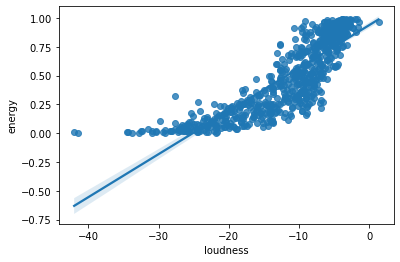

In [14]:
sns.regplot(x='loudness', y='energy', data=df2)

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

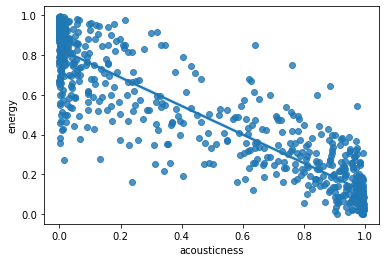

In [15]:
sns.regplot(x='acousticness', y='energy', data=df2)

<AxesSubplot:xlabel='acousticness', ylabel='loudness'>

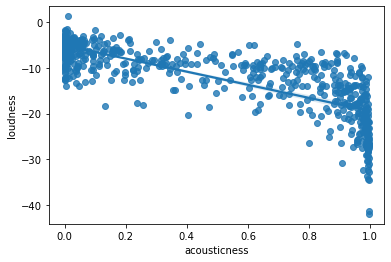

In [16]:
sns.regplot(x='acousticness', y='loudness', data=df2)

After this short data analysis, it is necessary to build a Pipeline to standardize the data through <code>StandardScaler</code> and make the Components Analysis through <code>PCA</code> technique. We will use 70% of our dataframe in order to avoid overfitting. 

For the purposes of reproduction of the DataFrame, the <code>random_state</code> parameter will be define as <code>1234</code> and assigned to the variable seed

In [17]:
SEED = 1234
np.random.seed(1234)
pca_pipeline = Pipeline([('scaler',StandardScaler()), 
                         ('PCA', PCA(n_components=0.7, random_state=SEED))])

In [18]:
df_moods

name  \
0                                           1999   
1                                             23   
2                                       9 Crimes   
3                                 99 Luftballons   
4    A Boy Brushed Red Living In Black And White   
..                                           ...   
681                                  windcatcher   
682              yellow is the color of her eyes   
683                           you broke me first   
684                          you were good to me   
685                                         æfre   

                               album          artist                      id  \
0                               1999          Prince  2H7PHVdQ3mXqEHXcvclTB0   
1                                 23  Blonde Redhead  4HIwL9ii9CcXpTOTzMq0MP   
2                                  9     Damien Rice  5GZEeowhvSieFDiR8fQ2im   
3                     99 Luftballons            Nena  6HA97v4wEGQ5TUClRM0XLc   
4        They're Only Chasing Safety       Underoath  47IWLfIKOKhFnz1FUEUIkE   
..                               ...             ...                     ...   
681                      windcatcher       Leo Nocta  59VApBbrS2IADQk4ml5mdo   
682  yellow is the color of her eyes    Soccer Mommy  4D3nttJPU6L0M2epr7sId6   
683               you broke me first      Tate McRae  45bE4HXI0AwGZXfZtMp8JR   
684                            brent   Jeremy Zucker  4CxFN5zON70B3VOPBYbd6P   
685                             æfre           praam  2irbT1BSYaIEF44PlyKaoM   

     popularity  danceability  acousticness  energy  instrumentalness  \
0            68         0.866       0.13700  0.7300          0.000000   
1            43         0.381       0.01890  0.8320          0.196000   
2            60         0.346       0.91300  0.1390          0.000077   
3             2         0.466       0.08900  0.4380          0.000006   
4            60         0.419       0.00171  0.9320          0.000000   
..          ...           ...           ...     ...               ...   
681          36         0.402       0.96100  0.2360          0.919000   
682           5         0.452       0.75700  0.5150          0.120000   
683          87         0.642       0.78600  0.3740          0.000000   
684          76         0.561       0.91300  0.0848          0.000026   
685          41         0.377       0.99400  0.0156          0.881000   

     liveness  valence  loudness  speechiness    tempo  time_signature  \
0      0.0843   0.6250    -8.201       0.0767  118.523               4   
1      0.1530   0.1660    -5.069       0.0492  120.255               4   
2      0.0934   0.1160   -15.326       0.0321  136.168               4   
3      0.1130   0.5870   -12.858       0.0608  193.100               4   
4      0.1370   0.4450    -3.604       0.1060  169.881               4   
..        ...      ...       ...          ...      ...             ...   
681    0.0921   0.1460   -20.615       0.0603  129.736               3   
682    0.1400   0.1910    -7.351       0.0255   80.537               4   
683    0.0906   0.0799    -9.386       0.0545  124.099               4   
684    0.1120   0.2060   -15.099       0.0404  102.128               4   
685    0.0991   0.0804   -28.435       0.0397  140.179               4   

     mood_Calm  mood_Energetic  mood_Happy  mood_Sad  
0            0               0           1         0  
1            0               0           0         1  
2            0               0           0         1  
3            0               0           1         0  
4            0               1           0         0  
..         ...             ...         ...       ...  
681          1               0           0         0  
682          0               0           0         1  
683          0               0           0         1  
684          0               0           0         1  
685          1               0           0         0  

[686 rows x 19 columns]

The DataFrame <code>projection</code> will be the created from the outcome of <code>df_moods</code> (<code>mood_embedding_pca</code>) through the Pipeline

In [19]:
mood_embedding_pca = pca_pipeline.fit_transform(df_moods.drop(['id','artist','album','name'], axis=1))
projection = pd.DataFrame(mood_embedding_pca)

In [20]:
pca_pipeline[1].n_components_

5

In [21]:
mood_embedding_pca

array([[-2.39157324, -1.36518263,  2.51029634, -0.25973101,  0.34577779],
       [-0.83401561, -0.78906698, -1.69500695, -0.44808354, -0.02710972],
       [ 1.31937135, -1.40674725, -1.61403318, -1.15679956,  0.55715111],
       ...,
       [ 0.18113985, -1.78669284, -0.83285626, -1.46300036,  1.77506574],
       [ 1.0769633 , -2.03367985, -0.76216052, -1.06680354,  1.69324362],
       [ 3.63169944,  1.02318233,  0.53780978, -0.63010035, -0.44312229]])

In [22]:
projection

0         1         2         3         4
0   -2.391573 -1.365183  2.510296 -0.259731  0.345778
1   -0.834016 -0.789067 -1.695007 -0.448084 -0.027110
2    1.319371 -1.406747 -1.614033 -1.156800  0.557151
3   -1.481015 -0.196788  0.733334  0.574310 -2.701284
4   -2.743797  1.896716 -0.969154 -0.973701  0.061559
..        ...       ...       ...       ...       ...
681  3.055752  1.109257  0.404262  1.035114 -0.051757
682  0.573026 -1.675048 -1.760564  0.542327 -0.412348
683  0.181140 -1.786693 -0.832856 -1.463000  1.775066
684  1.076963 -2.033680 -0.762161 -1.066804  1.693244
685  3.631699  1.023182  0.537810 -0.630100 -0.443122

[686 rows x 5 columns]

In [23]:
print(f"Number of Rows: {projection.shape[0]}\nNumber of columns: {projection.shape[1]}")

Number of Rows: 686
Number of columns: 5


### n_cluster validation

Once the DataFrame is ready, we need to set an optimal number of clusters for our recommendantion system. For that, the Sillhouette Score will be used as reference, along with a random dataframe assigned to the variable <code>random_data</code>, which contains the same number of rows and columns as <code>projection</code>

In [24]:
random_data = np.random.rand(686,5)
print(f"Number of Rows: {random_data.shape[0]}\nNumber of columns: {random_data.shape[1]}")

Number of Rows: 686
Number of columns: 5


In [25]:
random_data

array([[0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581],
       [0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263],
       [0.35781727, 0.50099513, 0.68346294, 0.71270203, 0.37025075],
       ...,
       [0.01314559, 0.20132326, 0.29192121, 0.16010375, 0.48397445],
       [0.64563914, 0.41341197, 0.61103894, 0.58554597, 0.84897027],
       [0.52327112, 0.81164891, 0.51784942, 0.94750604, 0.14352508]])

### Why Silhouette Score?

The main goal of the project is recommend songs for a specific moment. In this case, physical activities. Hence, the songs recommended from the user's choice should have similiar characteristics. The Sillhouette Score indicates the similiarity of an object compared to its own cluster, compared to other clusters. 

Values range from <code>-1</code> to <code>1</code>, where the higher the score, the better is the clustering

In [26]:
from sklearn.metrics import silhouette_score as s_score

The function <code>clustering_validation</code> will receive as parameter the number os cluster to be tested (<code>n_clusters</code>) and the dataset (<code>dataset</code>)

In [27]:
def clustering_validation(n_clusters, dataset):
    kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300, random_state=SEED)
    labels = kmeans.fit_predict(dataset)
    s = s_score(dataset, labels, metric='euclidean')
    return s 

We will assign the following values to <code>n_clusters</code>: <code>5</code>, <code>20</code> and <code>50</code>, comparing <code>projection</code> to <code>random_data</code>. 

We're looking for the highest score in order to determine our number of clusters.

In [28]:
s_moods_5 = clustering_validation(5,projection)
s_random_5 = clustering_validation(5,random_data)
print(f"Projection Silhouette Score: {s_moods_5}")
print(f"Random Data Sillhouete Score: {s_random_5}")

Projection Silhouette Score: 0.48615262675615684
Random Data Sillhouete Score: 0.16784310778369008


In [29]:
s_moods_20 = clustering_validation(20, projection)
s_random_20 = clustering_validation(20,random_data)
print(f"Projection Silhouette Score: {s_moods_20}")
print(f"Random Data Sillhouete Score: {s_random_20}")

Projection Silhouette Score: 0.25185099192485444
Random Data Sillhouete Score: 0.18842651179332343


In [30]:
s_moods_50 = clustering_validation(50,projection)
s_random_50 = clustering_validation(50,random_data)
print(f"Projection Silhouette Score: {s_moods_50}")
print(f"Random Data Sillhouete Score: {s_random_50}")

Projection Silhouette Score: 0.2211845150183364
Random Data Sillhouete Score: 0.18288660707160803


The optimal number of clusters is <code>5</code>. Important to notice the significant difference between our <code>random_data</code> scores and <code>projection</code> scores

The Sillhouette Score value is a very good indicator of the stability of our cluster, but lets split our DataFrame in 5 and to each of this sets, let's calculate their own Sillhouette Scores.

In [31]:
set1, set2, set3, set4, set5 = np.array_split(projection, 5)
s1 = clustering_validation(5,set1)
s2 = clustering_validation(5,set2) 
s3 = clustering_validation(5,set3)
s4 = clustering_validation(5,set4)
s5 = clustering_validation(5,set5)
print(s1, s2, s3, s4, s5)

0.44731205557467246 0.49515613652932916 0.5019799234722745 0.4539963586239956 0.4358936075354957


As shown above, ou clusters are stable and there's no significant difference between their Sillhoute Scores.

Further along the project, we will group the clusters with <code>.groupby()</code> and sum their <code>energy</code> levels in order to have visual and numerical understanding of the clustering performed by the K-Means technique

Now that we have the number of clusters, our pipelined DataFrame <code>projection</code>, the <code>kmeans_pca_pipeline</code> will instatiate <code>KMeans</code> which will fit our data to the model. Once, the <code>random_state</code> parameter is defined as <code>SEED</code>.

In [32]:
kmeans_pca_pipeline = KMeans(n_clusters=5, verbose=False, random_state=SEED)
kmeans_pca_pipeline.fit(projection)

KMeans(n_clusters=5, random_state=1234, verbose=False)

The column <code>cluster_pca</code> will be added to <code>df</code> and <code>projection</code> with the outcome of <code>kmeans_pca_pipeline.predict(projection)</code>

In [33]:
df['cluster_pca'] = kmeans_pca_pipeline.predict(projection)
projection['cluster_pca'] = kmeans_pca_pipeline.predict(projection)

The columns <code>artist</code>, <code>name</code> and <code>energy</code> will be "imported" from <code>df</code> to <code>projectio</code>, in order to build our recommendation system

In [34]:
projection['artist'] = df['artist']
projection['name'] = df['name']
projection['energy'] = df['energy']
projection.head(10)

0         1         2         3         4  cluster_pca  \
0 -2.391573 -1.365183  2.510296 -0.259731  0.345778            3   
1 -0.834016 -0.789067 -1.695007 -0.448084 -0.027110            1   
2  1.319371 -1.406747 -1.614033 -1.156800  0.557151            1   
3 -1.481015 -0.196788  0.733334  0.574310 -2.701284            3   
4 -2.743797  1.896716 -0.969154 -0.973701  0.061559            4   
5  3.468711  0.755210  0.954910 -1.168354 -0.006014            2   
6  2.529262  0.582623  1.089858  0.037040 -0.715914            2   
7 -1.862514 -0.554799  1.356120  1.155381 -1.955080            3   
8 -3.629038  2.643469 -0.246900  0.708351  3.006919            4   
9 -2.870962  2.802562 -2.006053  1.305558 -0.668305            4   

                   artist                                               name  \
0                  Prince                                               1999   
1          Blonde Redhead                                                 23   
2             Damien Rice                                           9 Crimes   
3                    Nena                                     99 Luftballons   
4               Underoath        A Boy Brushed Red Living In Black And White   
5      Emmanuelle Rimbaud                                   A Burden to Bear   
6             Ron Adelaar                                         A La Plage   
7           Elvis Presley  A Little Less Conversation - JXL Radio Edit Remix   
8             Linkin Park                                A Place for My Head   
9  Thirty Seconds To Mars                                             ATTACK   

   energy  
0  0.7300  
1  0.8320  
2  0.1390  
3  0.4380  
4  0.9320  
5  0.0475  
6  0.0584  
7  0.9350  
8  0.9080  
9  0.8760

As mentioned above, here is the sum of the values of <code>energy</code> for each cluster contained in our clustering <code>projection['cluster_pca']</code>

In [35]:
projection.groupby("cluster_pca")['energy'].sum().to_frame()

energy
cluster_pca           
0              2.31378
1             75.41900
2             29.68494
3             96.33200
4            144.52800

Below, the 3D visualization of the clusters. 

In [36]:
fig = px.scatter_3d(projection, x=0, y=1, z = 'cluster_pca', color='cluster_pca')
fig.show()

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. 
Below, its values: 

In [37]:
variance_ratio = pca_pipeline[1].explained_variance_ratio_
for i in variance_ratio:
    print(i)

0.3603097640251467
0.1139124224840144
0.10838089626548392
0.06980151875734583
0.06501194015679124


Now lets sum them, multiply by <code>100</code> and print the Explained Variance Ratio

In [38]:
variance_ratio_sum = pca_pipeline[1].explained_variance_ratio_.sum()
print(f"Explained Variance Ratio: {variance_ratio_sum*100:.2f}%")

Explained Variance Ratio: 71.74%


And the number of explained components

In [39]:
components = pca_pipeline[1].explained_variance_.sum()
print(f"Explained Components: {int(components)}")

Explained Components: 10


What <code>projection</code> looks like now

In [40]:
projection

0         1         2         3         4  cluster_pca  \
0   -2.391573 -1.365183  2.510296 -0.259731  0.345778            3   
1   -0.834016 -0.789067 -1.695007 -0.448084 -0.027110            1   
2    1.319371 -1.406747 -1.614033 -1.156800  0.557151            1   
3   -1.481015 -0.196788  0.733334  0.574310 -2.701284            3   
4   -2.743797  1.896716 -0.969154 -0.973701  0.061559            4   
..        ...       ...       ...       ...       ...          ...   
681  3.055752  1.109257  0.404262  1.035114 -0.051757            2   
682  0.573026 -1.675048 -1.760564  0.542327 -0.412348            1   
683  0.181140 -1.786693 -0.832856 -1.463000  1.775066            1   
684  1.076963 -2.033680 -0.762161 -1.066804  1.693244            1   
685  3.631699  1.023182  0.537810 -0.630100 -0.443122            2   

             artist                                         name  energy  
0            Prince                                         1999  0.7300  
1    Blonde Redhead                                           23  0.8320  
2       Damien Rice                                     9 Crimes  0.1390  
3              Nena                               99 Luftballons  0.4380  
4         Underoath  A Boy Brushed Red Living In Black And White  0.9320  
..              ...                                          ...     ...  
681       Leo Nocta                                  windcatcher  0.2360  
682    Soccer Mommy              yellow is the color of her eyes  0.5150  
683      Tate McRae                           you broke me first  0.3740  
684   Jeremy Zucker                          you were good to me  0.0848  
685           praam                                         æfre  0.0156  

[686 rows x 9 columns]

### Euclidean Distances 

In machine learning, Euclidean distance is a common method used to measure the similarity between two data points. When calculating Euclidean distance between two points in a multi-dimensional space, we need to compare the values of each dimension or feature between the two points.

We will use the method to build the recommendation system

In [41]:
from sklearn.metrics import euclidean_distances

We are looking for energtic song the cluster with the highest level of energy is number <code>4</code>. Let's now check the songs contained in that cluster

In [42]:
projection[projection['cluster_pca']==4]['name'].unique()

array(['A Boy Brushed Red Living In Black And White',
       'A Place for My Head', 'ATTACK', 'Adagio For Strings',
       'Afraid of Heights', 'Afterlife', 'Alive',
       'All These Things I Hate (Revolve Around Me)',
       'All in the Suit That You Wear', 'Always', 'Angry Chair',
       'Anthem of Our Dying Day', 'As I Sleep (feat. Charlee)',
       'Away From Me', 'Back Where I Belong (feat. Avicii)',
       'Bat Country', 'Beautiful Night', 'Billinghurst', 'Blackout',
       'Blame', 'Blaster', 'Bleed American', 'Body Rock', 'Boiler',
       'Bottom of a Bottle', 'Break Stuff', 'Car Underwater',
       'Children Of Today', 'Chop Suey!', 'Click Click Boom',
       'Cold as Stone (feat. Charlotte Lawrence) - Lipless Remix',
       'Come Out And Play (Keep ‘Em Separated)', 'Coming Undone',
       'Count That - R3HAB Edit', 'Crawling In The Dark',
       'Crystal Baller - 2006 Remaster', 'Dancing Through Sunday',
       'Dani California', 'Deep Dark Jungle', 'Devotion And Desire',
  

So, working out to the sound of Rage Against The Machine is always a good call. Let's assing the song <code>'Renegades Of Funk'</code> to the variable <code>song</code>

In [43]:
song = 'Renegades Of Funk'

In [44]:
projection[projection['name']==song]

0         1         2         3        4  cluster_pca  \
446 -3.224087  0.998701  0.111385 -0.205318  0.94058            4   

                       artist               name  energy  
446  Rage Against The Machine  Renegades Of Funk   0.908

We will build the dataframe <code>recommendations</code> with the names of the songs and contained in <code>projection['cluster_pca']==4</code> and their respective values in columns <code>0</code> and <code>1</code>.

In [45]:
recommendations = projection[projection['cluster_pca']==4][[0,1,'name']]

In [46]:
recommendations

0         1                                         name
4   -2.743797  1.896716  A Boy Brushed Red Living In Black And White
8   -3.629038  2.643469                          A Place for My Head
9   -2.870962  2.802562                                       ATTACK
10  -1.222704  2.052526                           Adagio For Strings
13  -3.341989  1.482998                            Afraid of Heights
..        ...       ...                                          ...
639 -2.789877  1.175616                White Lies - Guy Arthur Remix
644 -1.940914  1.345136                     Wild Wild Son - Club Mix
650 -2.151457  0.840846                                      Without
658 -2.198107 -0.004079                                    Wrong Way
664 -2.547729  1.246958                     You're Gonna Go Far, Kid

[164 rows x 3 columns]

The variables <code>x_song</code> and <code>y_song</code> will hold the values of <code>0</code> and <code>1</code> for the song we chose in order to calculate the euclidean distances between it and the other songs

In [47]:
x_song = list(projection[projection['name']==song][0])[0]
y_song = list(projection[projection['name']==song][1])[0]

In [48]:
print(x_song, y_song)

-3.2240866227337612 0.998701176958259


The distance between the song we chose and the others in the cluster will be assigned to the variable <code>distances</code>  which will be futher added to <code>recommendations</code>, along with <code>df['id']</code>.

<code>recommendations_sorted</code> will be sort the values by distance.

In [49]:
distances = euclidean_distances(recommendations[[0,1]], [[x_song, y_song]])
#distances

In [50]:
recommendations['id'] =  df['id']
recommendations['distances'] = distances
recommendations_sorted = recommendations.sort_values('distances').head(30)
recommendations_sorted

0         1                                      name  \
446 -3.224087  0.998701                         Renegades Of Funk   
309 -3.249514  1.117968           Like The First Time - House Mix   
362 -3.050675  1.226869                        My Own Worst Enemy   
489 -2.994669  0.737384                           Smooth Criminal   
129 -2.915992  0.829588                           Dani California   
126 -3.039267  1.340155                    Dancing Through Sunday   
172 -3.617261  0.977242                                 Every Way   
164 -2.766716  1.074843  Electronic Memories (feat. Mickey Kojak)   
587 -2.807817  1.210457                               Tubthumping   
639 -2.789877  1.175616             White Lies - Guy Arthur Remix   
191 -2.871466  1.319940                                      Flex   
206 -2.945186  1.393519                                  Gasoline   
146 -3.703493  1.086199              Don't Stop Me Now - 2011 Mix   
13  -3.341989  1.482998                         Afraid of Heights   
611 -2.761503  1.212269                                    Voices   
110 -2.707614  1.106659                   Count That - R3HAB Edit   
268 -2.833946  1.372676                             Inside Of You   
404 -2.937617  1.470351            Over My Head (Better Off Dead)   
143 -2.650562  1.004015                               Do It Again   
400 -2.687435  0.783430            Out Of Control - Pat Vocal Mix   
49  -2.769430  1.372771                               Bat Country   
411 -2.802922  0.578377                                 Paralyzer   
113 -2.607342  0.920336                      Crawling In The Dark   
305 -2.616891  1.173081           Lift Me Up (feat. Carla Monroe)   
599 -2.620119  1.196179                     Up Against (Blackout)   
42  -2.819961  1.548055        Back Where I Belong (feat. Avicii)   
260 -2.650529  0.625078                                       ID8   
142 -2.727330  1.483088                 Do Bad Well (feat. Nevve)   
150 -2.553212  0.765712                                   Dragula   
23  -2.724320  1.505448             All in the Suit That You Wear   

                         id  distances  
446  5YBVDvTSSSiqv7KZDeUlXA   0.000000  
309  5ABnK6bOqbsIRVsrc1UBOt   0.121947  
362  33iv3wnGMrrDugd7GBso1z   0.286587  
489  2T3blUc9Jnui2a0ZhuNOag   0.347734  
129  10Nmj3JCNoMeBQ87uw5j8k   0.351457  
126  4O5GKVbnQ8U9BxYWu0hIug   0.388264  
172  4xxyCh7xkK30LVBO81poif   0.393760  
164  2viJufnGlsjR1X51CEHpeg   0.463665  
587  6dL46HEj2hzaSach8EFyCi   0.467034  
639  1FoMWISq2KNqKappkrG5Yo   0.468868  
191  43p1IlKF0PBgwkqzS2EdCk   0.477007  
206  4e7yuouxvWPbK1q2kVlgz8   0.483390  
146  7hQJA50XrCWABAu5v6QZ4i   0.487325  
13   0P44AUPRzaIAHNWquN0fGR   0.498442  
611  47H4oc7Zkihwae7ST7F4zp   0.509505  
110  1J1wnDwBjkFvDVOxNOLVjY   0.527636  
268  6okaxit4V1bU6yIVVsP836   0.540432  
404  3SO0vfryYv381w1ImgWONG   0.551832  
143  5yzzy7Hevww3RDntQM5mG1   0.573549  
400  6wCsrMyI3DavGvodBx8A7h   0.578219  
49   6irNz2hSXvd2QJG0vXyBFR   0.588762  
411  6k1njNBYUIQgWJLG4ed26y   0.595022  
113  1eK4KsyjAzr2xJ86Tj5SWa   0.621703  
305  0vK80mtYypq4dAwQelZ2Dh   0.631739  
599  7dx3zyB8aQHd2LQm0u1lwS   0.635432  
42   78W8wiUIlQ2SnWY9TVowKZ   0.681988  
260  2jxfHzOYVLmGKejNRHvqoc   0.684516  
142  7zHrHnVSQwI95FGHewXDl8   0.693828  
150  6Nm8h73ycDG2saCnZV8poF   0.710181  
23   17Nk1aji6gd26vabky7fMi   0.711729

The libray <code>spotipy</code> will connect us to Spotify using <code>client_id</code> and <code>client_secret</code>.

The credentials are created with <code>SpotifyClientCredentials</code> and <code>sp</code> receive these parameters in order to extract information such as album covers, names of the songs, etc.

In [51]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials 

In [52]:
scope = 'user-library-read playlist-modify-private'
client_id = '23e8bc89c69342b0a45315c4ecc57919'
client_secret = '5461de2cb2ac42adb55f2fac095cc718'
OAuth = SpotifyOAuth(
        scope = scope,
    redirect_uri = 'http://localhost:5000/callback',
    client_id = client_id,
    client_secret = client_secret
        )
client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

Song ID is responsible for identifying the song on Spotify database and return its information. Both <code>df</code> and <code>recommendations_sorted</code> have this information. We will use <song> in order to get the ID for <code>df</code>

In [53]:
song_id = df[df['name']==song]['id'].iloc[0]
print(song_id) 

5YBVDvTSSSiqv7KZDeUlXA


The variable <code>track</code> will receive <code>sp.track()</code> with <code>song_id</code> as parameter and <code>url</code> and <code>name</code> the link for the album/single cover and the song's name, respectively

In [54]:
track = sp.track(song_id)
#track.keys()
url = track["album"]["images"][1]["url"]
name = track["name"]

Below, the album cover, displayed using <code>matplotlib.pyplot</code>

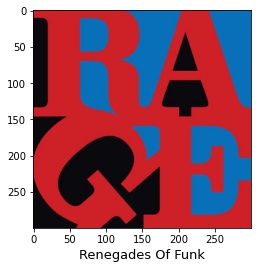

In [55]:
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize=13)
plt.show()

Now, we need to create a list containing the names and urls of the songs in <code>recommendations_sorted</code>, in order to display visually what's been recommended to us.

The function <code>recommendations</code> will loop through <code>recommendations_sorted</code> and return two lists containing names and urls, which will laber be assigned to the variables <code>name</code> and <code>url</code> respectively

In [56]:
def recommendations(playlist_id):
    url = []
    name = []
    for i in playlist_id:
        track = sp.track(i)
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
    return name, url 

In [57]:
name, url = recommendations(recommendations_sorted['id'])

The function <code>album_cover</code> will receive these two variables as parameter and using using <code>matplotlib.pypolt</code> will return an image with the album covers for the 30 songs contained in <code>recommendations_sorted</code>

In [58]:
def album_cover(name, url):
    plt.figure(figsize=(12,20))
    columns = 6
    
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 7)
        plt.tight_layout(h_pad = 0.5, w_pad = 0)
        plt.subplots_adjust(wspace = None, hspace = None)
        plt.tick_params(bottom = False)
        plt.grid(visible = None)
    plt.show()

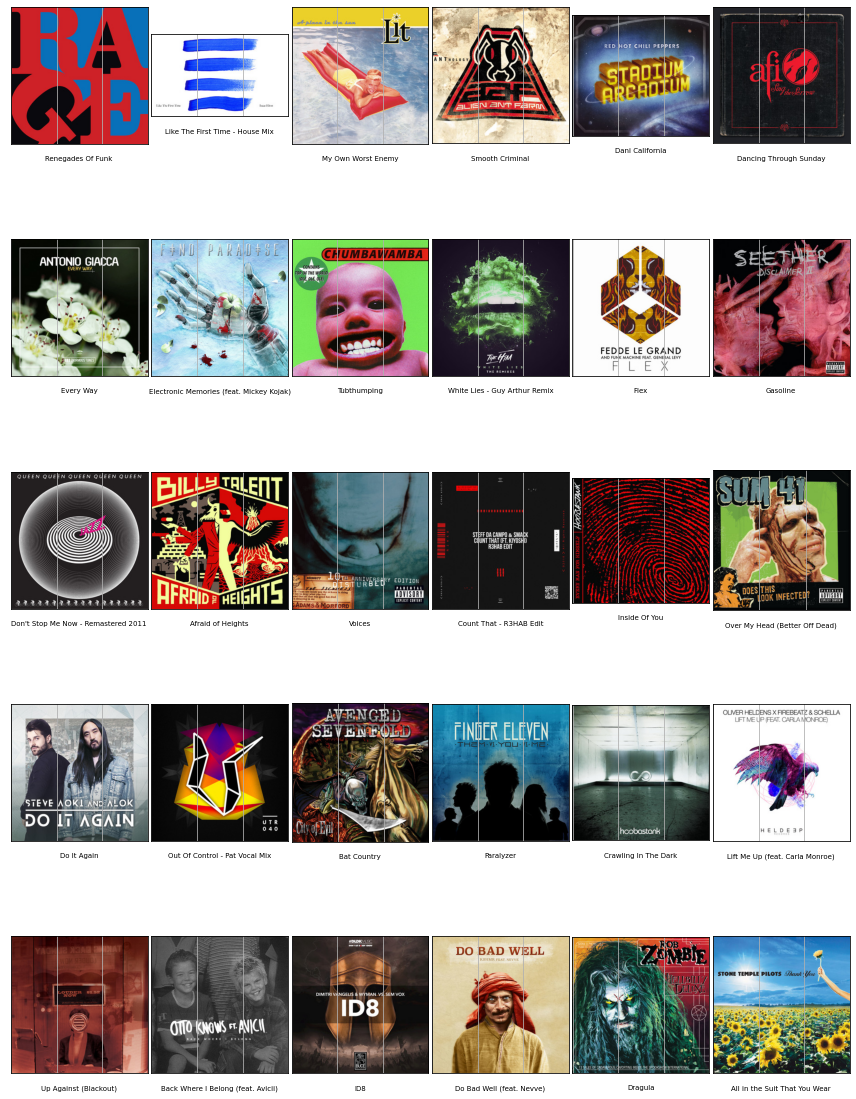

In [59]:
album_cover(name,url)

The function below (<code>song_choice</code>)summarizes all the process. It receives the song name as a parameter and returns a list 30 songs based on the song you chose

For the purposes of demonstration all the songs in cluster 4 will be assigned to <code>random_choice</code> which will randomly choose one so it can be passed though <code>song_choice</code> and test the function

In [66]:
from random import choice 

In [67]:
random_choice = choice(projection[projection['cluster_pca']==4]['name'].unique())
print(random_choice)

Coming Undone


In [60]:
def song_choice(song_name):
    recommendation = projection[projection['cluster_pca']==4][[0,1,'name']]
    song = projection[projection['name']==song_name]
    x_song = list(projection[projection['name']==song_name][0])[0] 
    y_song = list(projection[projection['name']==song_name][1])[0]
    distances = euclidean_distances(recommendation[[0,1]],[[x_song, y_song]])
    recommendation['id'] = df['id']
    recommendation['distances'] = distances 
    recommendation_sorted = recommendation.sort_values('distances').head(30)
    #return recommendation_sorted
   
    playlist_id = recommendation_sorted['id']
    
    url = []
    name = []
    for i in playlist_id:
        track = sp.track(i)
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
    
    plt.figure(figsize = (12,20))
    columns = 6
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 9)
        plt.tight_layout(h_pad = 0.3, w_pad =0)
        plt.subplots_adjust(wspace = None, hspace = None)
        plt.grid(visible = None)
        plt.tick_params(bottom = False)
    plt.show()
    

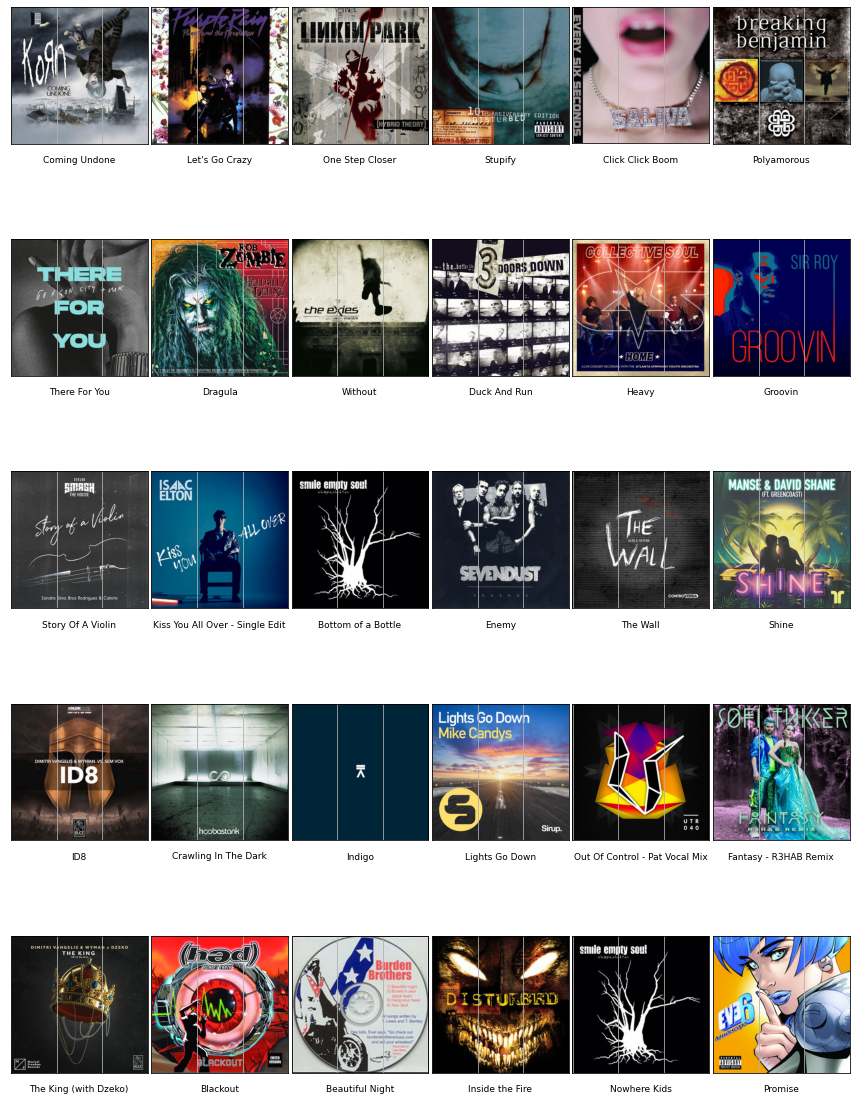

In [68]:
song_choice(random_choice)